In [1]:
library(DropletUtils)
library(scds)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

In [2]:
p0_raw <- read10xCounts("/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/")

pdf 
  3

png 
  2

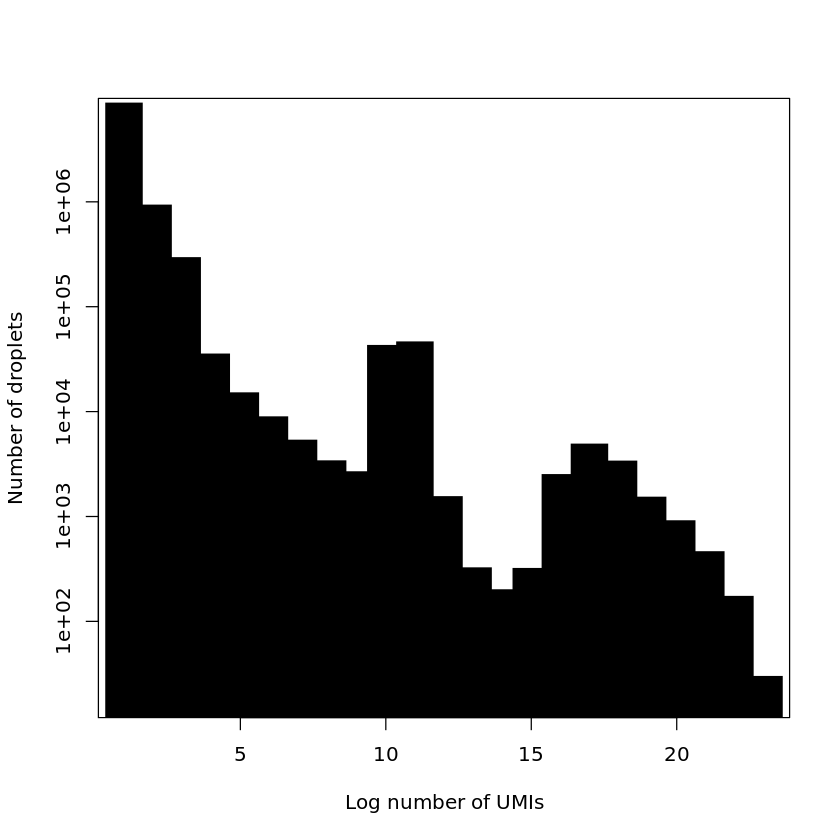

In [89]:
#plot number of umis per droplet
#add pseudocount of 1 for log transform
library(Matrix)
p0_raw_umi_droplet_counts = colSums(counts(p0_raw))+1
p0_raw_droplet_umi_hist = hist(log(p0_raw_umi_droplet_counts),plot=FALSE,breaks=20) 
plot(p0_raw_droplet_umi_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of UMIs",ylab="Number of droplets")
dev.copy(pdf,'../plots/P0_raw_umi_hist.pdf')
dev.off()


pdf 
  3

png 
  2

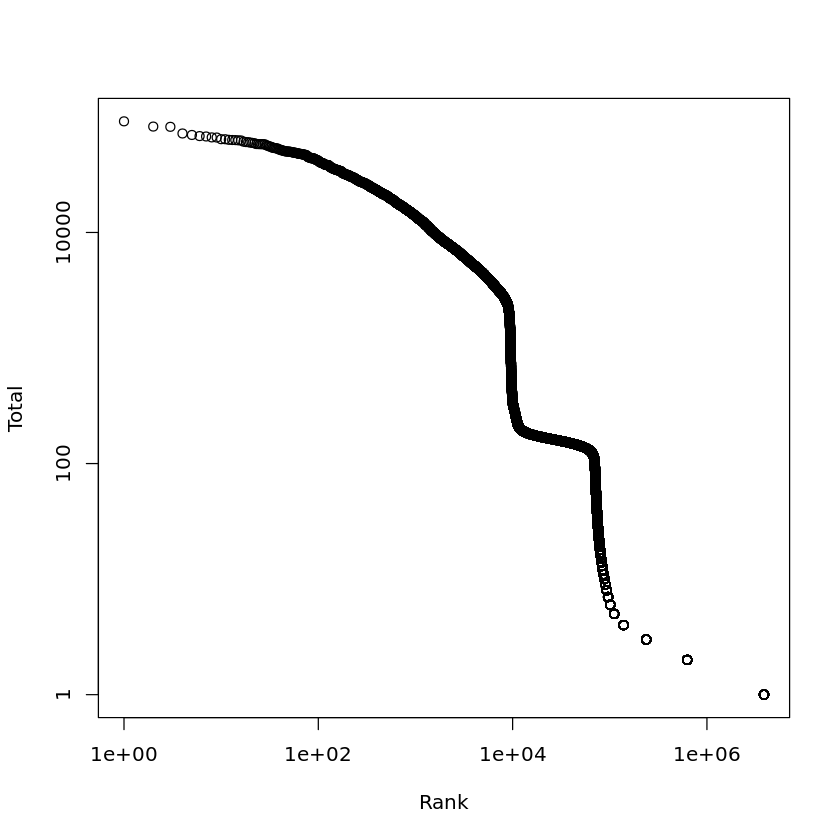

In [21]:
p0_br_out = barcodeRanks(counts(p0_raw))
plot(p0_br_out$rank, p0_br_out$total+1, log="xy", xlab="Rank", ylab="Total")
dev.copy(pdf,'P0_raw_umi_rank_plot.pdf')
dev.off()

pdf 
  3

png 
  2

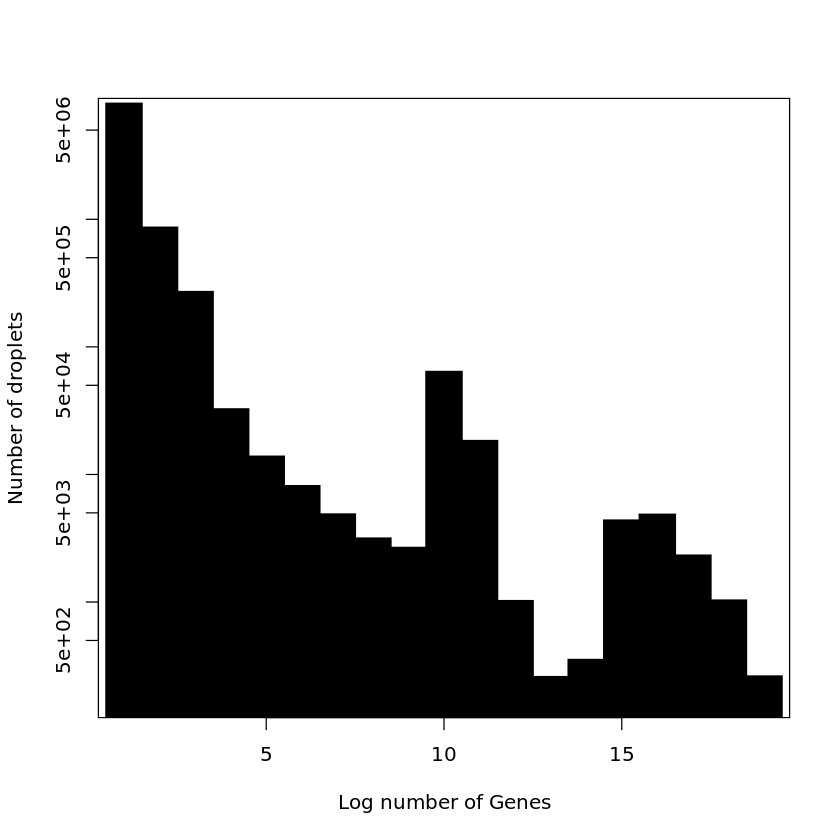

In [22]:
p0_raw_gene_droplet_counts = colSums(counts(p0_raw)>0)+1
p0_raw_droplet_gene_hist = hist(log(p0_raw_gene_droplet_counts),plot=FALSE,breaks=20) 
plot(p0_raw_droplet_gene_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of Genes",ylab="Number of droplets")
dev.copy(pdf,'P0_raw_gene_hist.pdf')
dev.off()

pdf 
  3

png 
  2

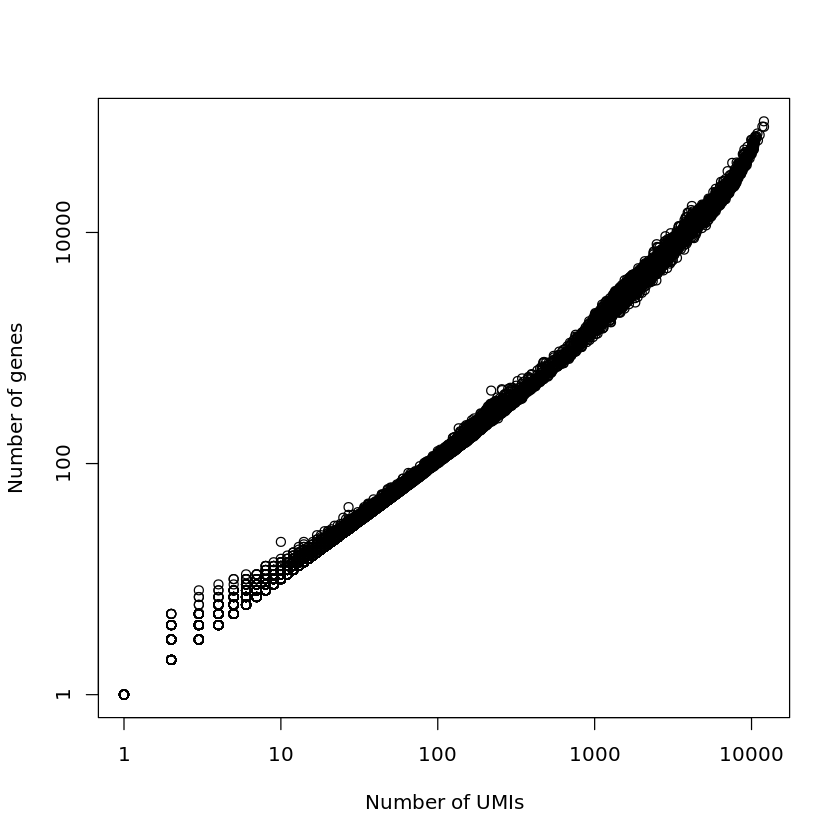

In [23]:
plot(p0_raw_umi_droplet_counts~p0_raw_gene_droplet_counts,log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'P0_raw_umi_vs_gene.pdf')
dev.off()

In [15]:
#predict which droplets are empty, the defaultdrops functin replciates the same task in cell ranger
p0_called <- defaultDrops(counts(p0_raw))

pdf 
  3

png 
  2

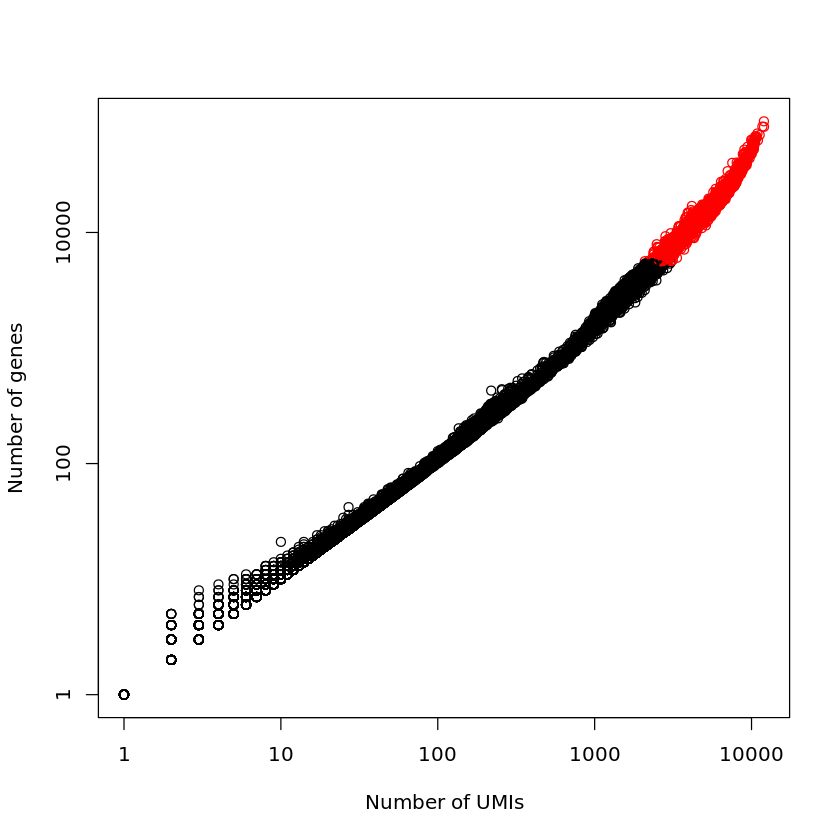

In [24]:
plot(p0_raw_umi_droplet_counts~p0_raw_gene_droplet_counts,col=ifelse(p0_called,"red","black"),log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'P0_raw_umi_vs_gene_called.pdf')
dev.off()

pdf 
  3

png 
  2

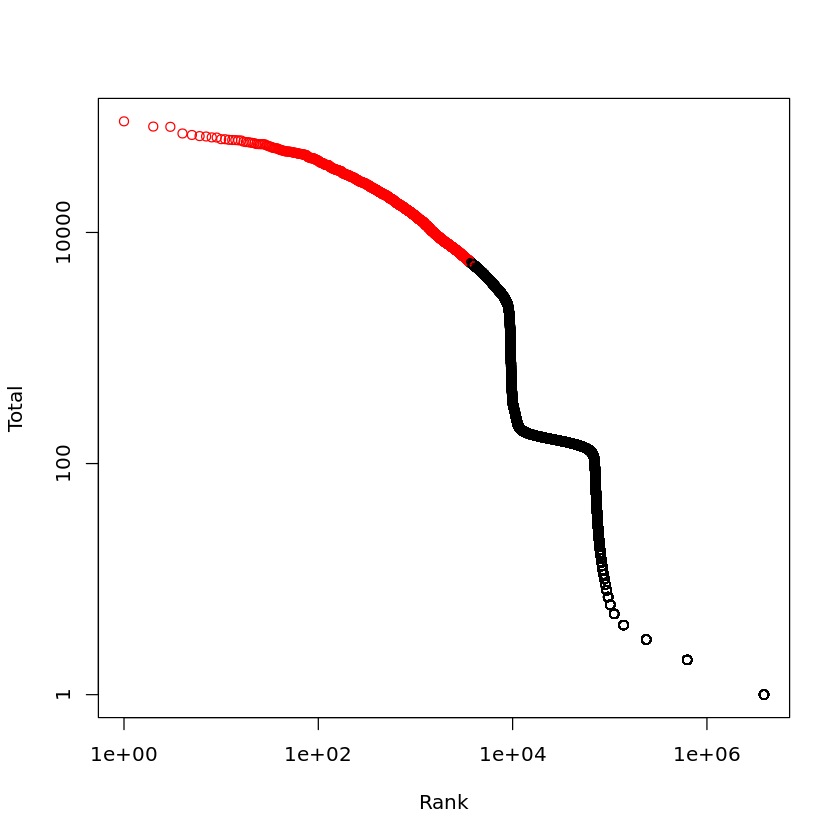

In [84]:
plot(p0_br_out$rank, p0_br_out$total+1, col=ifelse(p0_called,"red","black"),log="xy", xlab="Rank", ylab="Total")
dev.copy(pdf,'P0_raw_umi_rank_called_plot.pdf')
dev.off()

In [26]:
p0_called_exp = p0_raw[,p0_called]

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“2 y values <= 0 omitted from logarithmic plot”


pdf 
  3

png 
  2

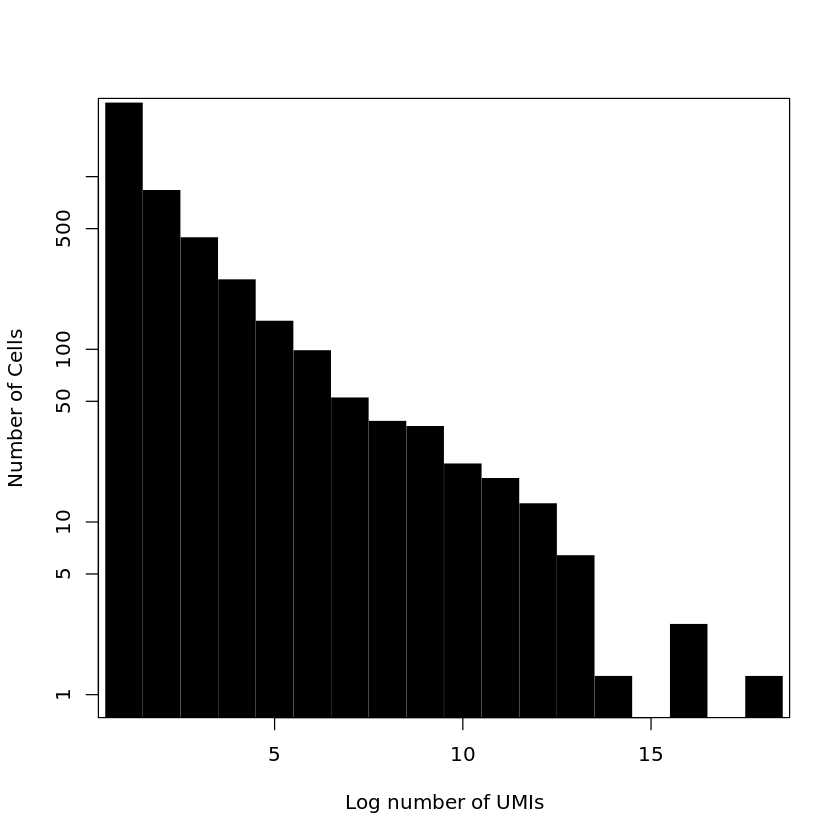

In [31]:
#plot number of umis per cell
p0_called_droplet_umi_hist = hist(p0_raw_umi_droplet_counts[p0_called],plot=FALSE,breaks=30) 
plot(p0_called_droplet_umi_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of UMIs",ylab="Number of Cells")
dev.copy(pdf,'P0_called_umi_hist.pdf')
dev.off()

Warning message in hist.default(log(p0_raw_gene_droplet_counts[p0_called]), plot = FALSE, :
“argument ‘border’ is not made use of”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”


pdf 
  3

png 
  2

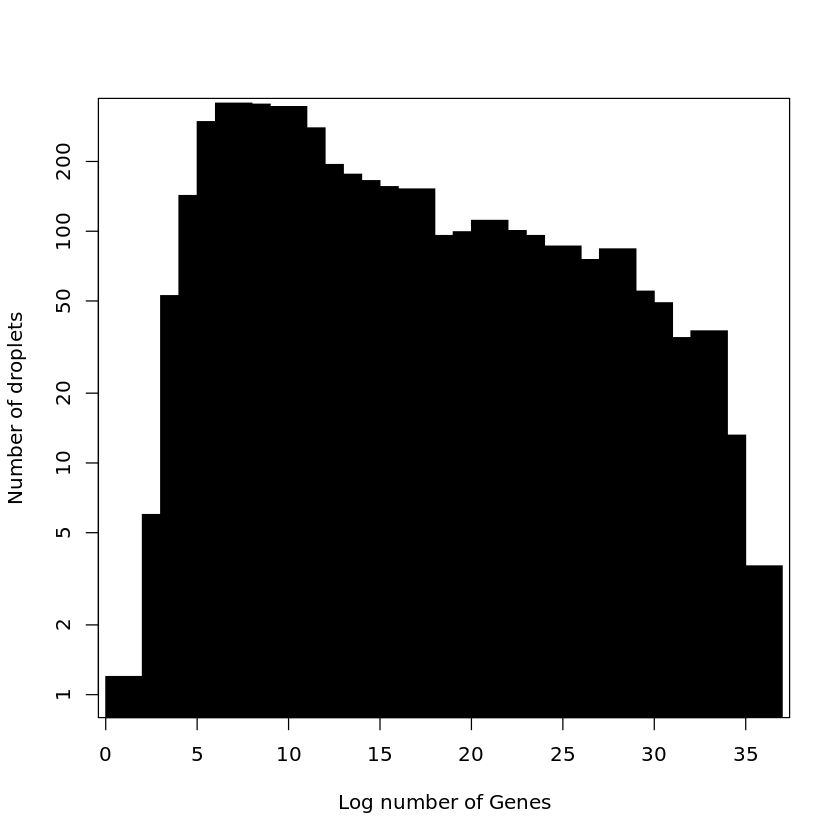

In [79]:

#plot number of genes per droplet
p0_raw_droplet_gene_hist = hist(log(p0_raw_gene_droplet_counts[p0_called]),plot=FALSE,breaks=30,border="black") 
plot(p0_raw_droplet_gene_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of Genes",ylab="Number of droplets")
dev.copy(pdf,'P0_called_gene_hist.pdf')
dev.off()

pdf 
  3

png 
  2

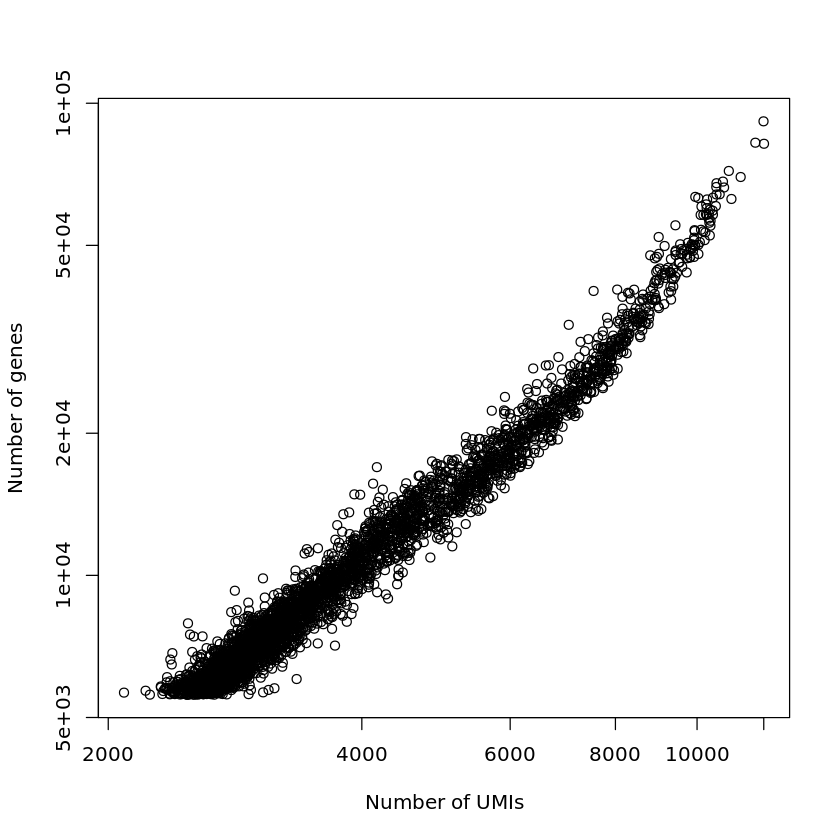

In [80]:

#plotting number of UMIs vs number of genes for called cells
plot(p0_raw_umi_droplet_counts[p0_called]~p0_raw_gene_droplet_counts[p0_called],log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'P0_called_umi_vs_gene_hist.pdf')
dev.off()

In [81]:
p0_called_exp <- cxds_bcds_hybrid(p0_called_exp,list("retRes"=TRUE))


[11:10:48] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


pdf 
  3

png 
  2

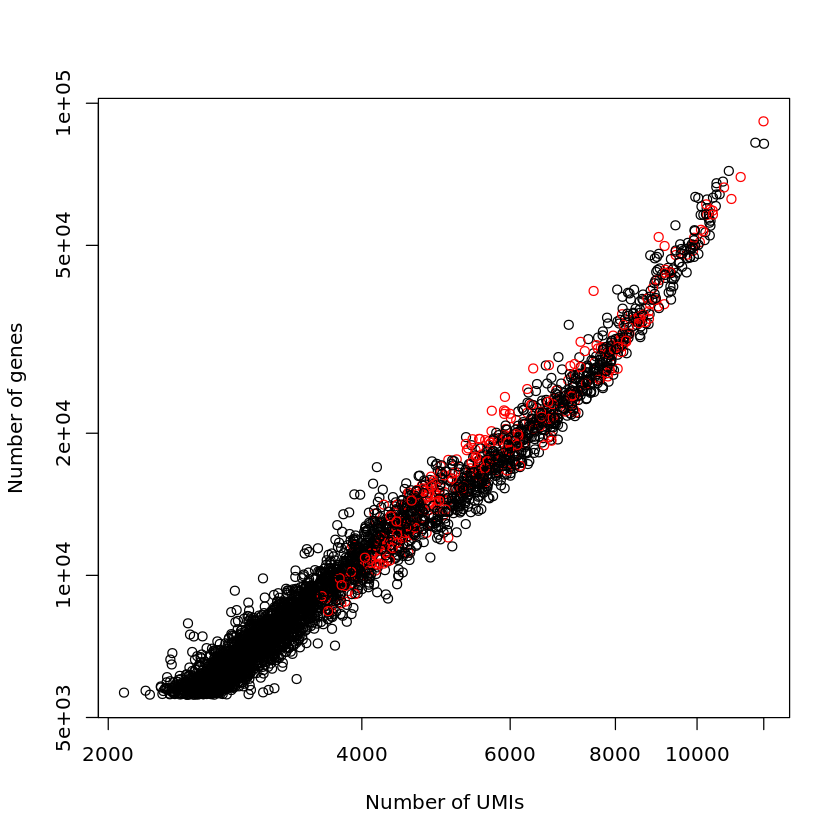

In [95]:
#selected doublets should have higher number of UMIs and genes
plot(p0_raw_umi_droplet_counts[p0_called]~p0_raw_gene_droplet_counts[p0_called],col=ifelse(p0_called_exp$hybrid_score>1.0,"red","black"),log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'../plots/P0_doublets_selected_scatter.pdf')
dev.off()

In [90]:
write.csv(p0_called_exp@colData,"../paper_inter_data/p0_empty_drops_filtered_annotation.csv")

In [93]:
writeMM(counts(p0_called_exp),"../paper_inter_data/p0_empty_drops_filtered_annotation.csv")

NULL

pdf 
  3

png 
  2

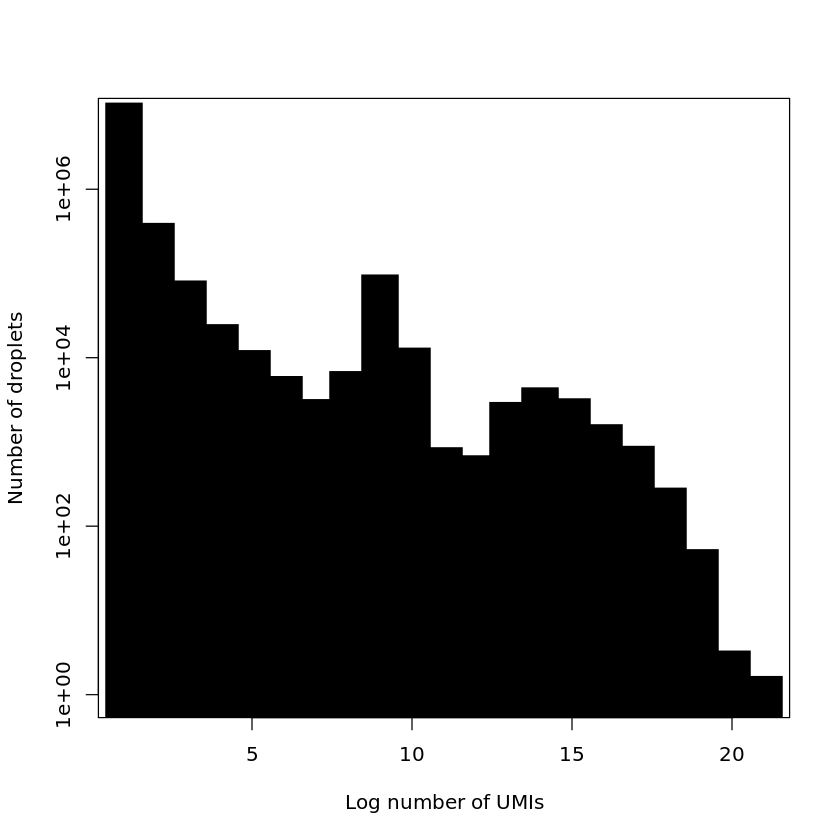

pdf 
  3

png 
  2

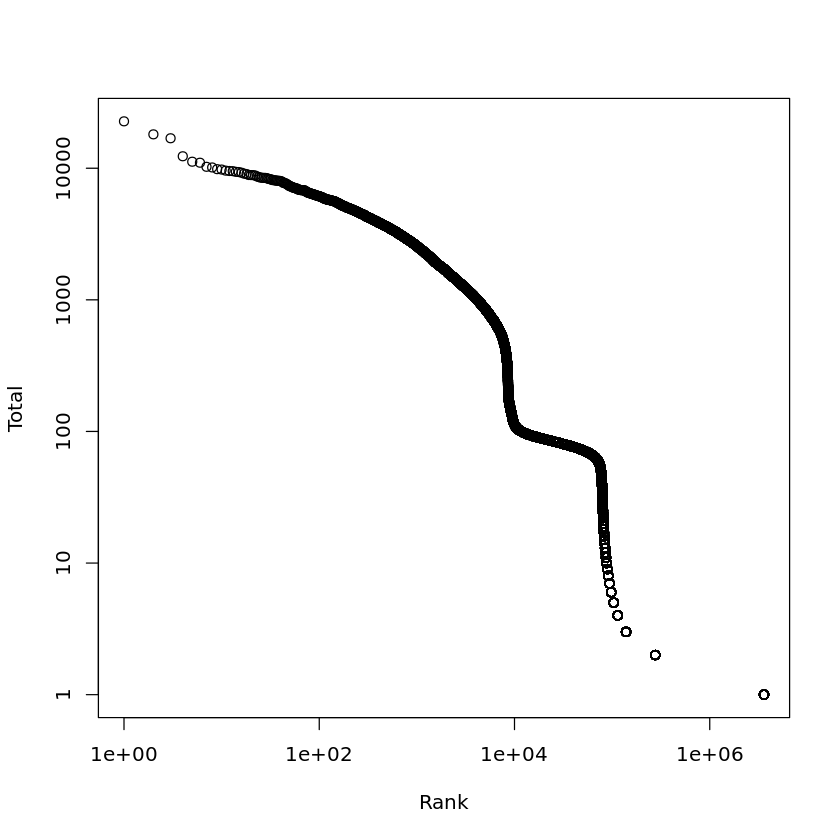

pdf 
  3

png 
  2

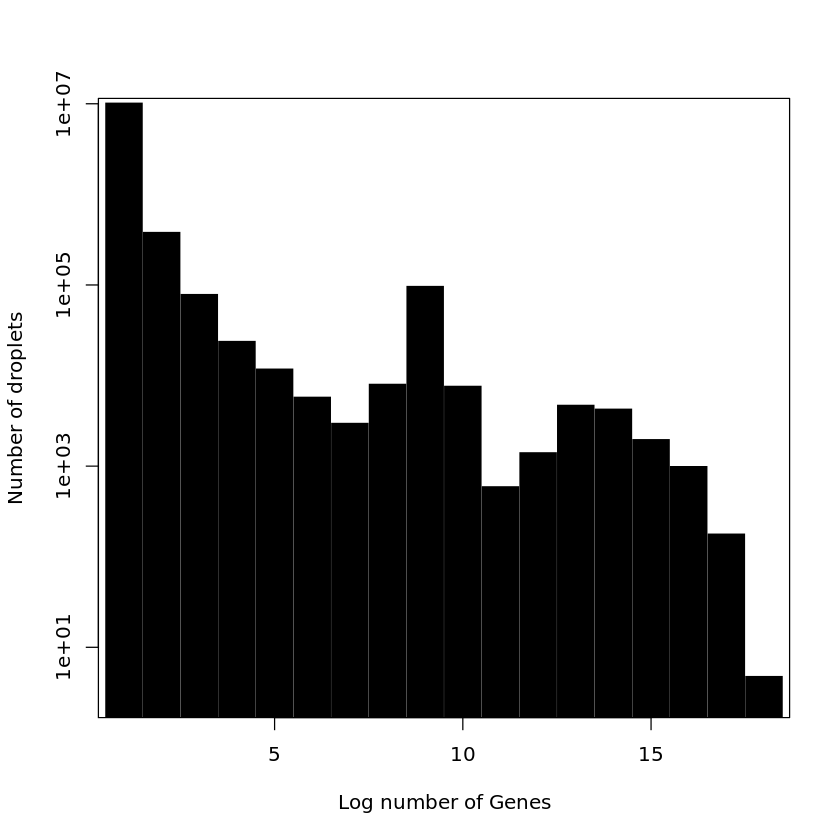

pdf 
  3

png 
  2

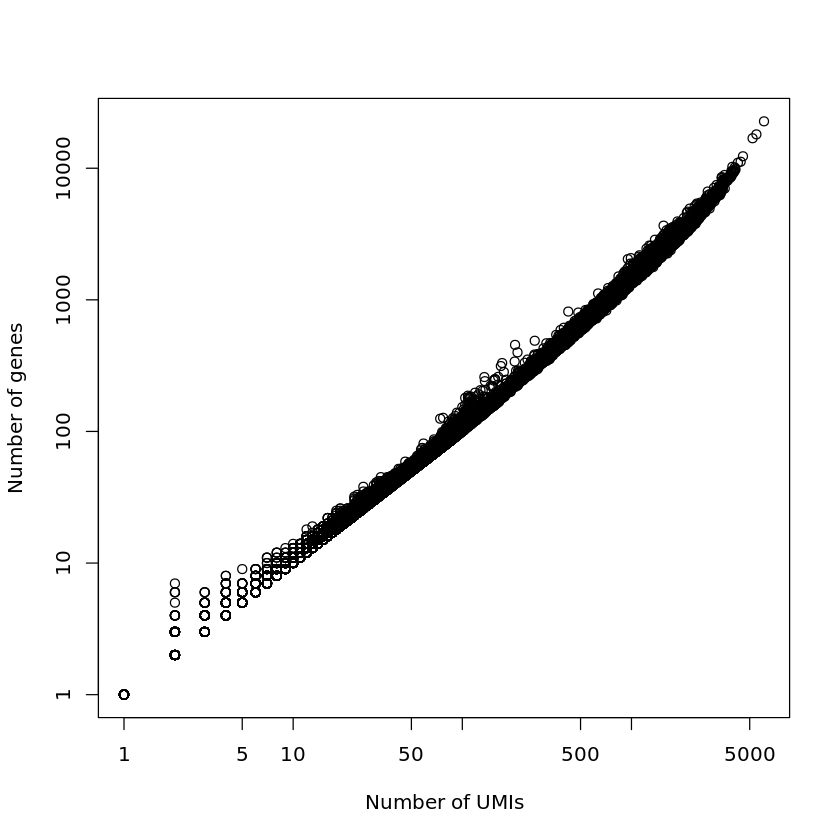

pdf 
  3

png 
  2

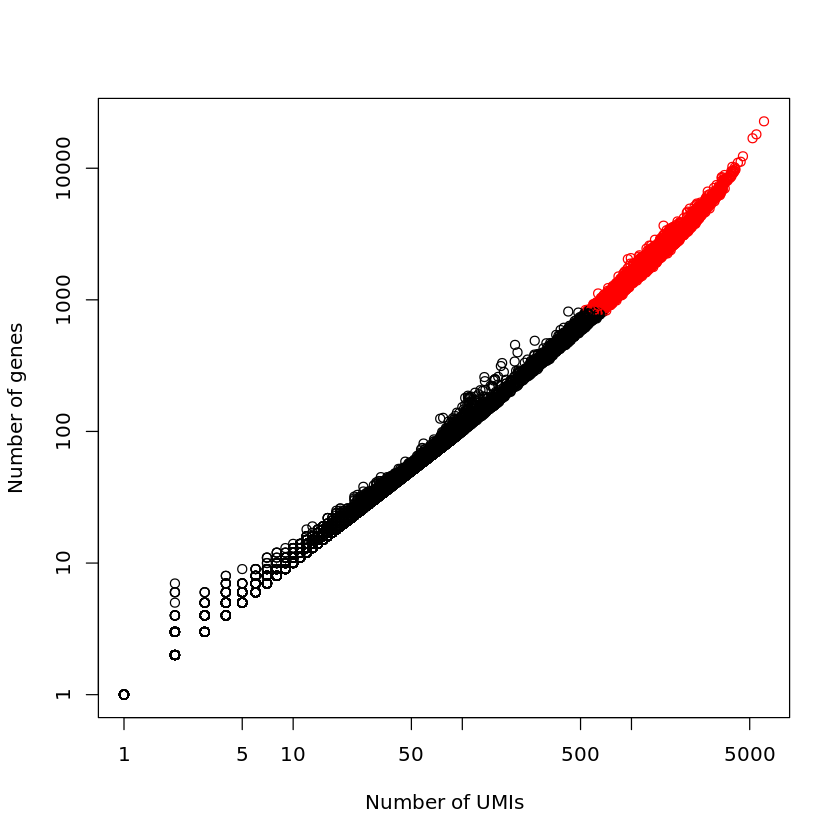

pdf 
  3

png 
  2

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“7 y values <= 0 omitted from logarithmic plot”


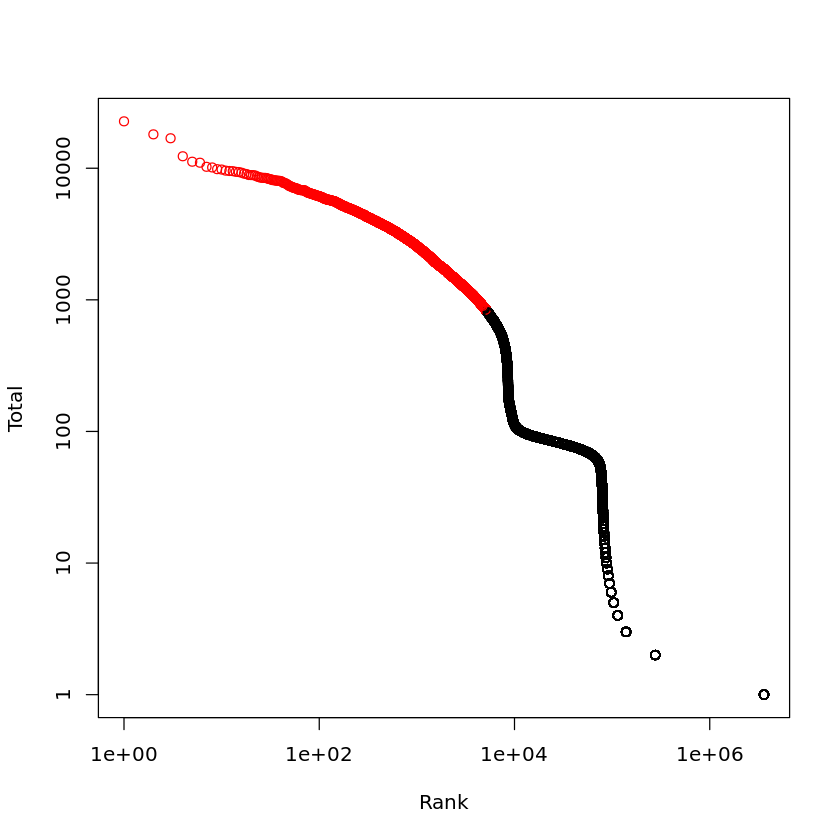

pdf 
  3

png 
  2

Warning message in hist.default(log(P2_raw_gene_droplet_counts[P2_called]), plot = FALSE, :
“argument ‘border’ is not made use of”


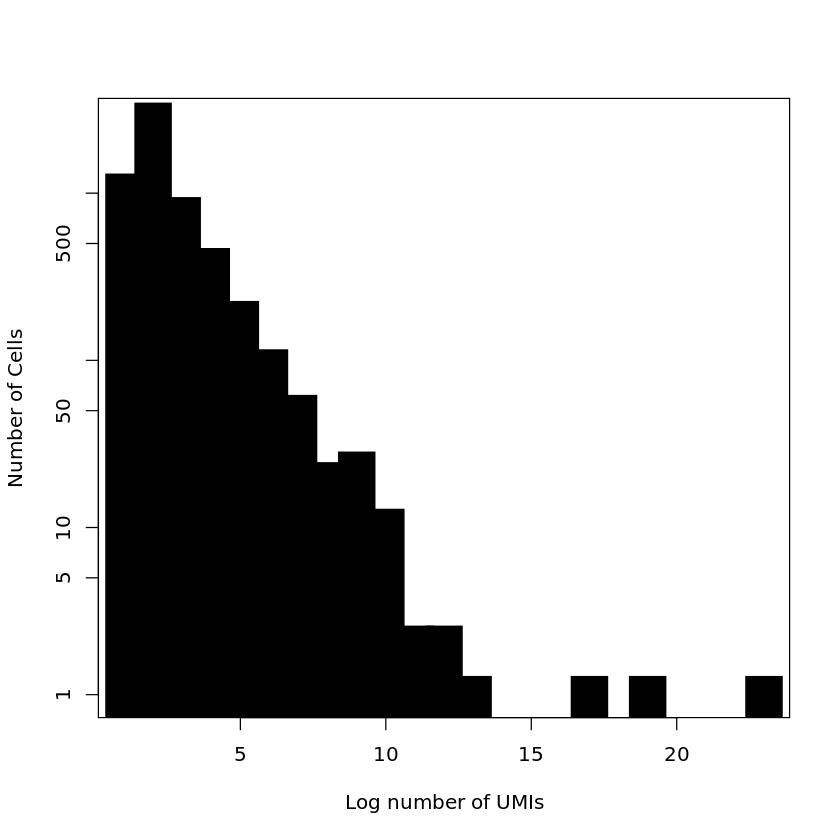

pdf 
  3

png 
  2

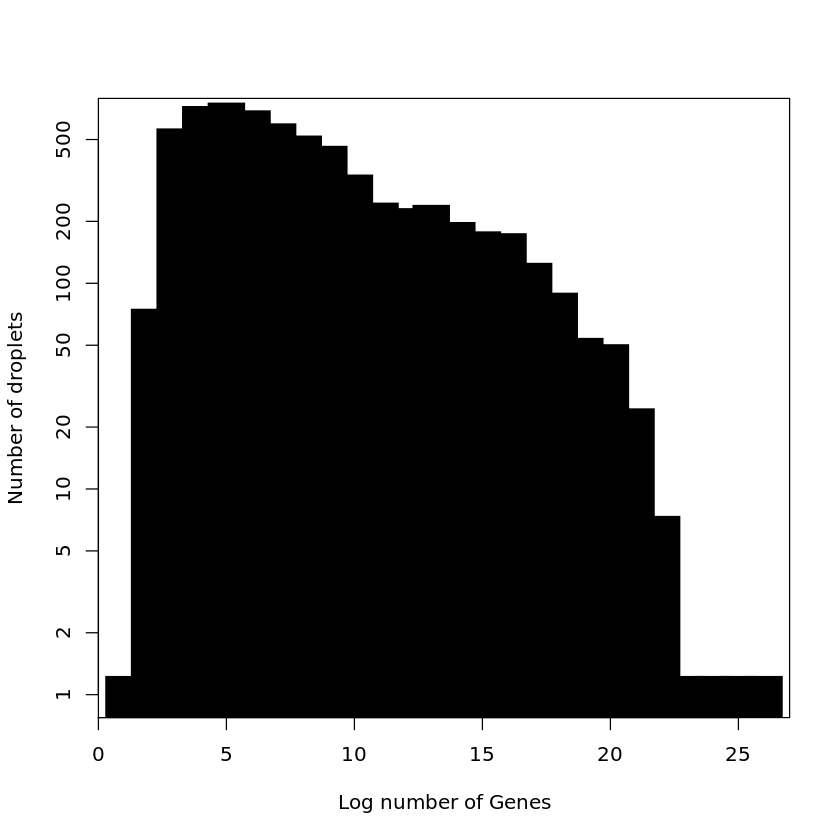

pdf 
  3

png 
  2

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'colData': object 'P2_called_exp' not found


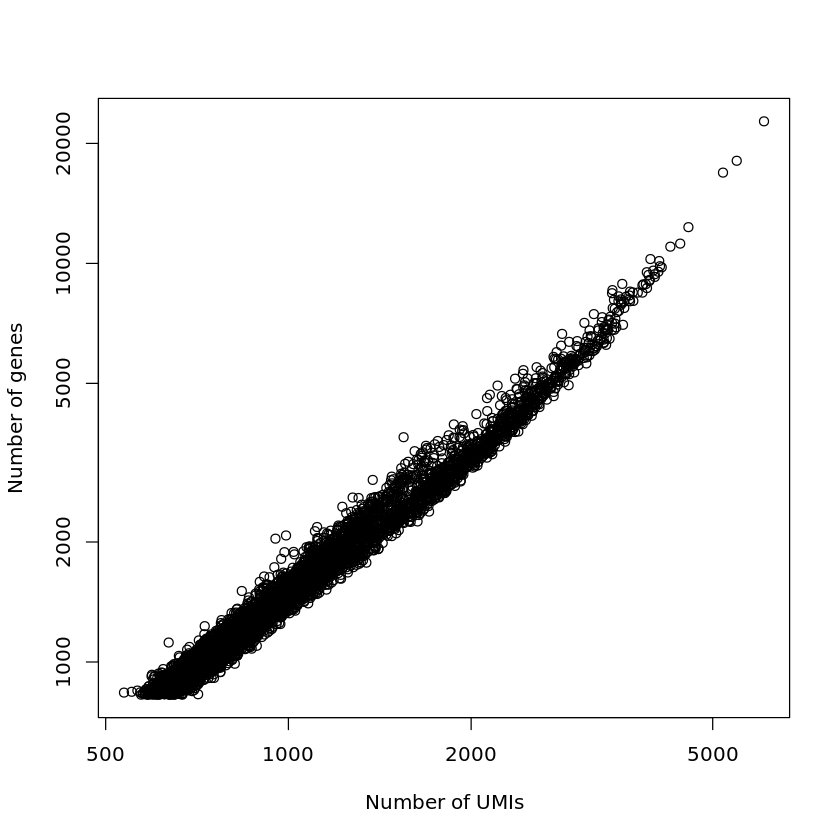

In [96]:
P2_raw <- read10xCounts("/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P2/Solo.out/")

P2_raw_umi_droplet_counts = colSums(counts(P2_raw))+1
P2_raw_droplet_umi_hist = hist(log(P2_raw_umi_droplet_counts),plot=FALSE,breaks=20) 
plot(P2_raw_droplet_umi_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of UMIs",ylab="Number of droplets")
dev.copy(pdf,'../plots/P2_raw_umi_hist.pdf')
dev.off()

P2_br_out = barcodeRanks(counts(P2_raw))
plot(P2_br_out$rank, P2_br_out$total+1, log="xy", xlab="Rank", ylab="Total")
dev.copy(pdf,'../plots/P2_raw_umi_rank_plot.pdf')
dev.off()

P2_raw_gene_droplet_counts = colSums(counts(P2_raw)>0)+1
P2_raw_droplet_gene_hist = hist(log(P2_raw_gene_droplet_counts),plot=FALSE,breaks=20) 
plot(P2_raw_droplet_gene_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of Genes",ylab="Number of droplets")
dev.copy(pdf,'../plots/P2_raw_gene_hist.pdf')
dev.off()

plot(P2_raw_umi_droplet_counts~P2_raw_gene_droplet_counts,log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'../plots/P2_raw_umi_vs_gene.pdf')
dev.off()

#predict which droplets are empty, the defaultdrops functin replciates the same task in cell ranger
P2_called <- defaultDrops(counts(P2_raw))

plot(P2_raw_umi_droplet_counts~P2_raw_gene_droplet_counts,col=ifelse(P2_called,"red","black"),log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'../plots/P2_raw_umi_vs_gene_called.pdf')
dev.off()

plot(P2_br_out$rank, P2_br_out$total+1, col=ifelse(P2_called,"red","black"),log="xy", xlab="Rank", ylab="Total")
dev.copy(pdf,'../plots/P2_raw_umi_rank_called_plot.pdf')
dev.off()

#plot number of umis per cell
P2_called_droplet_umi_hist = hist(P2_raw_umi_droplet_counts[P2_called],plot=FALSE,breaks=30) 
plot(P2_called_droplet_umi_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of UMIs",ylab="Number of Cells")
dev.copy(pdf,'../plots/P2_called_umi_hist.pdf')
dev.off()

P2_raw_droplet_gene_hist = hist(log(P2_raw_gene_droplet_counts[P2_called]),plot=FALSE,breaks=30,border="black") 
plot(P2_raw_droplet_gene_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of Genes",ylab="Number of droplets")
dev.copy(pdf,'../plots/P2_called_gene_hist.pdf')
dev.off()

plot(P2_raw_umi_droplet_counts[P2_called]~P2_raw_gene_droplet_counts[P2_called],log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'../plots/P2_called_umi_vs_gene_hist.pdf')
dev.off()



[15:29:27] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


pdf 
  3

png 
  2

NULL

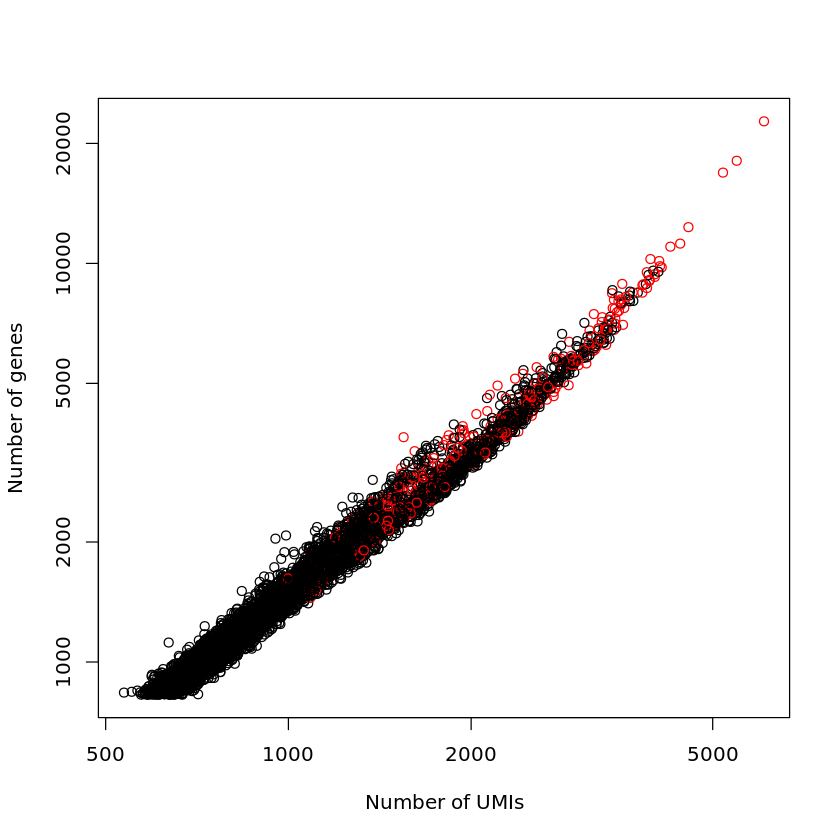

In [99]:
P2_called_exp = P2_raw[,P2_called]

P2_called_exp <- cxds_bcds_hybrid(P2_called_exp,list("retRes"=TRUE))

#selected doublets should have higher number of UMIs and genes
plot(P2_raw_umi_droplet_counts[P2_called]~P2_raw_gene_droplet_counts[P2_called],col=ifelse(P2_called_exp$hybrid_score>1.0,"red","black"),log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'../plots/P2_doublets_selected_scatter.pdf')
dev.off()

write.csv(P2_called_exp@colData,"../paper_inter_data/P2_empty_drops_filtered_annotation.csv")

writeMM(counts(P2_called_exp),"../paper_inter_data/P2_empty_drops_filtered_counts.mtx")

pdf 
  3

png 
  2

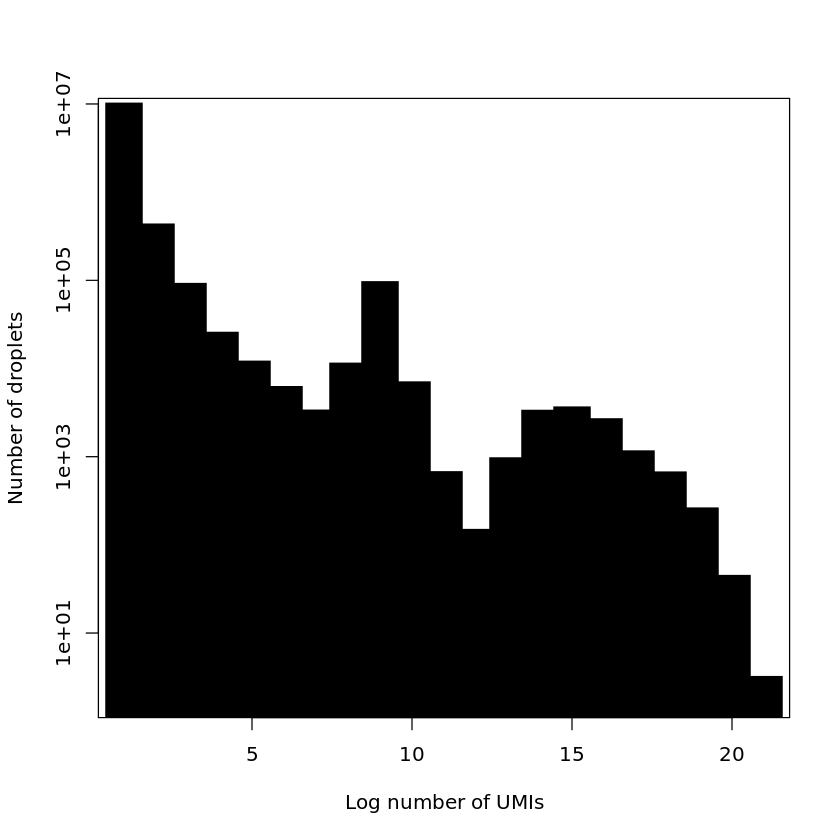

pdf 
  3

png 
  2

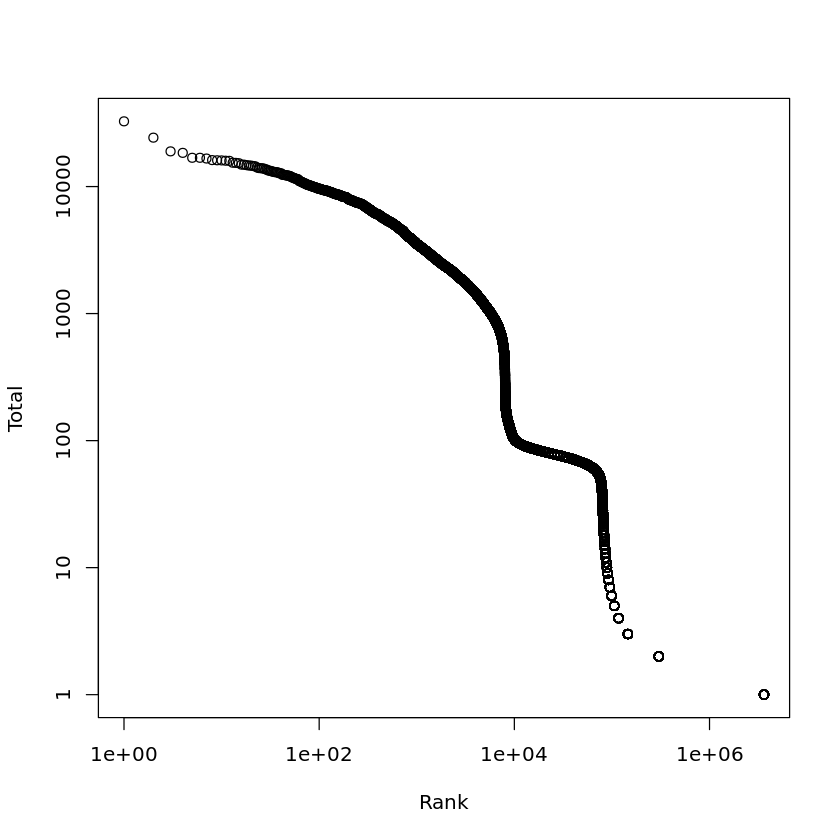

pdf 
  3

png 
  2

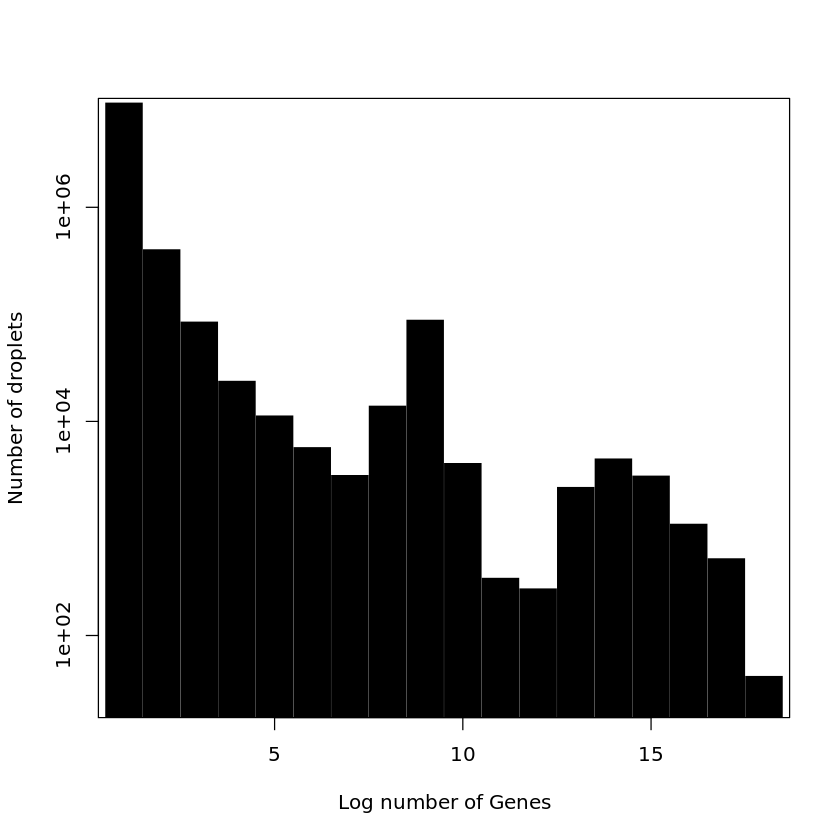

pdf 
  3

png 
  2

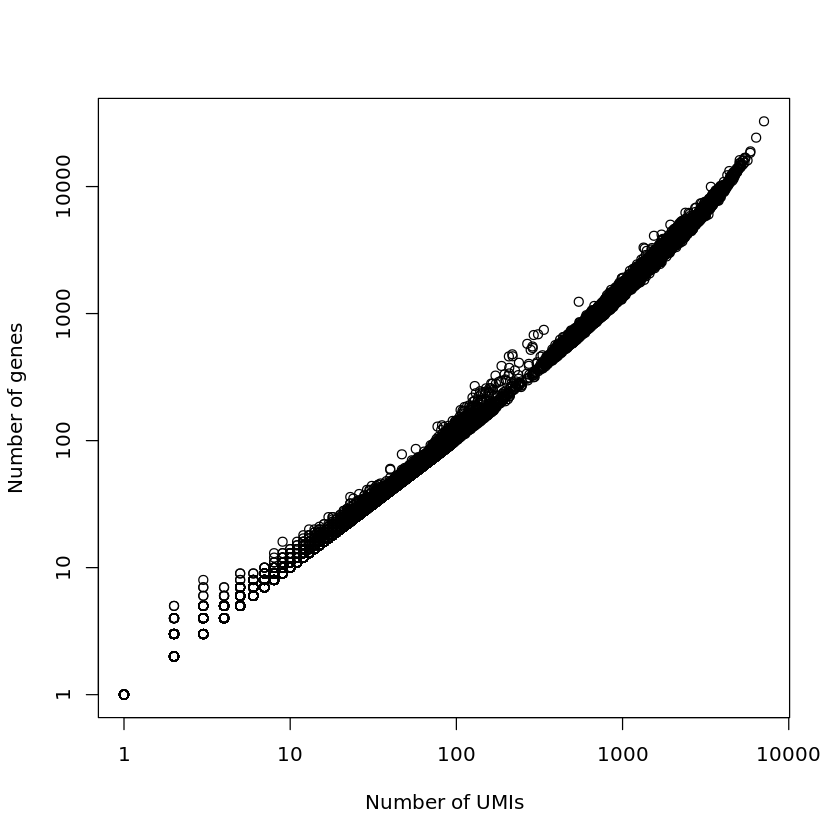

pdf 
  3

png 
  2

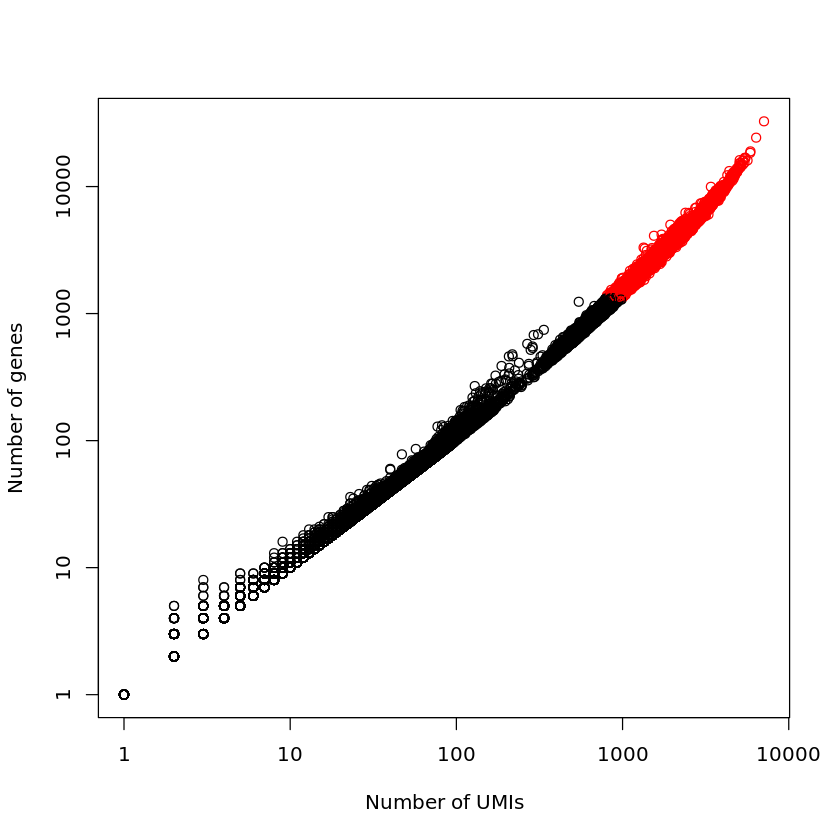

pdf 
  3

png 
  2

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“13 y values <= 0 omitted from logarithmic plot”


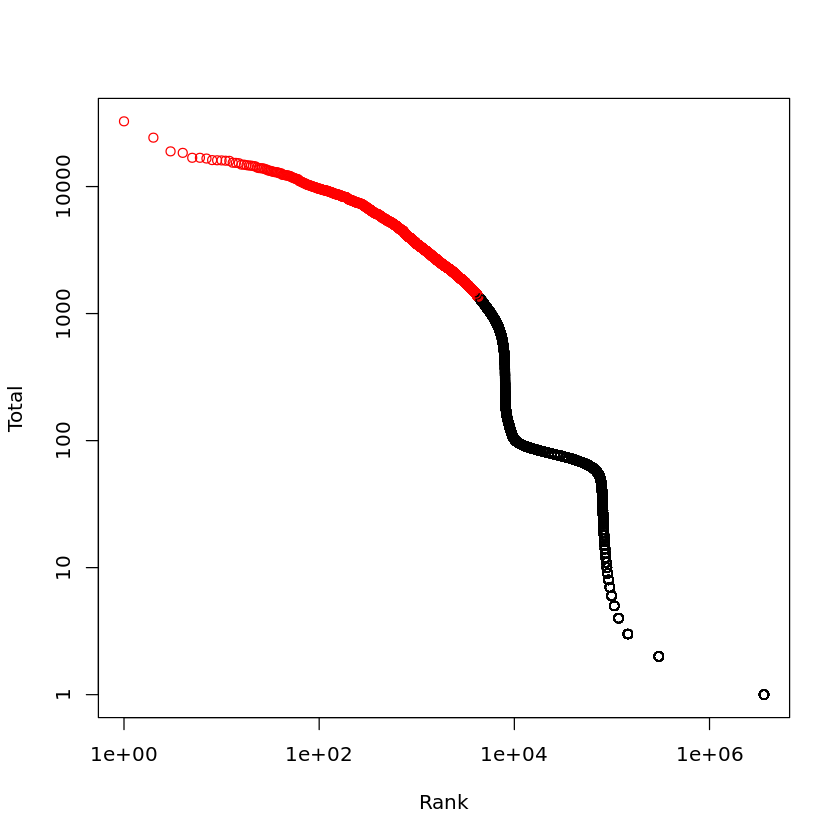

pdf 
  3

png 
  2

Warning message in hist.default(log(P3_raw_gene_droplet_counts[P3_called]), plot = FALSE, :
“argument ‘border’ is not made use of”


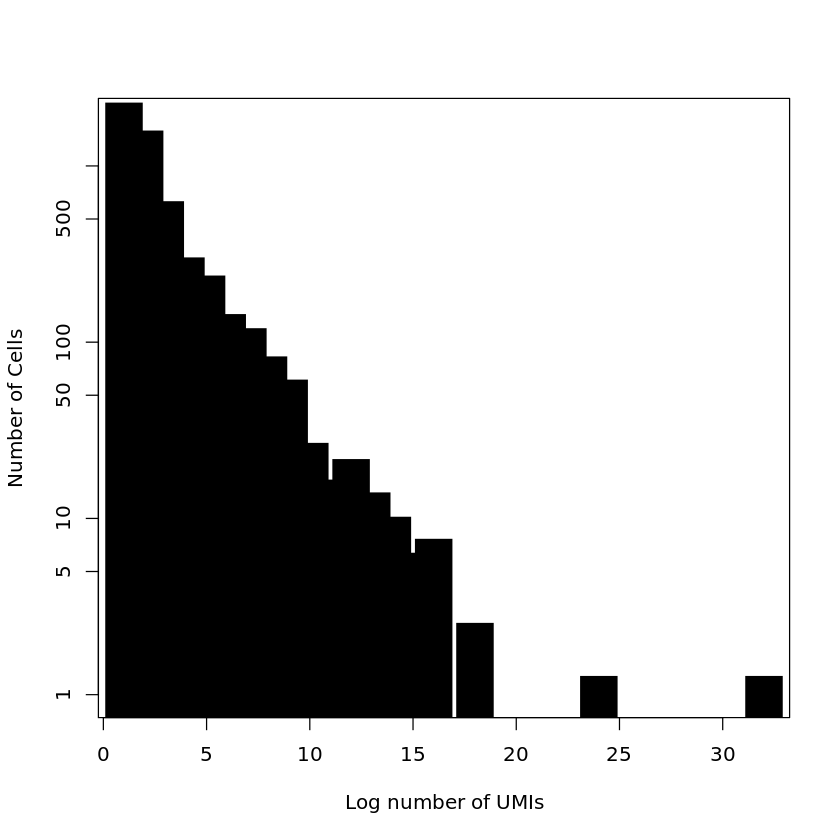

pdf 
  3

png 
  2

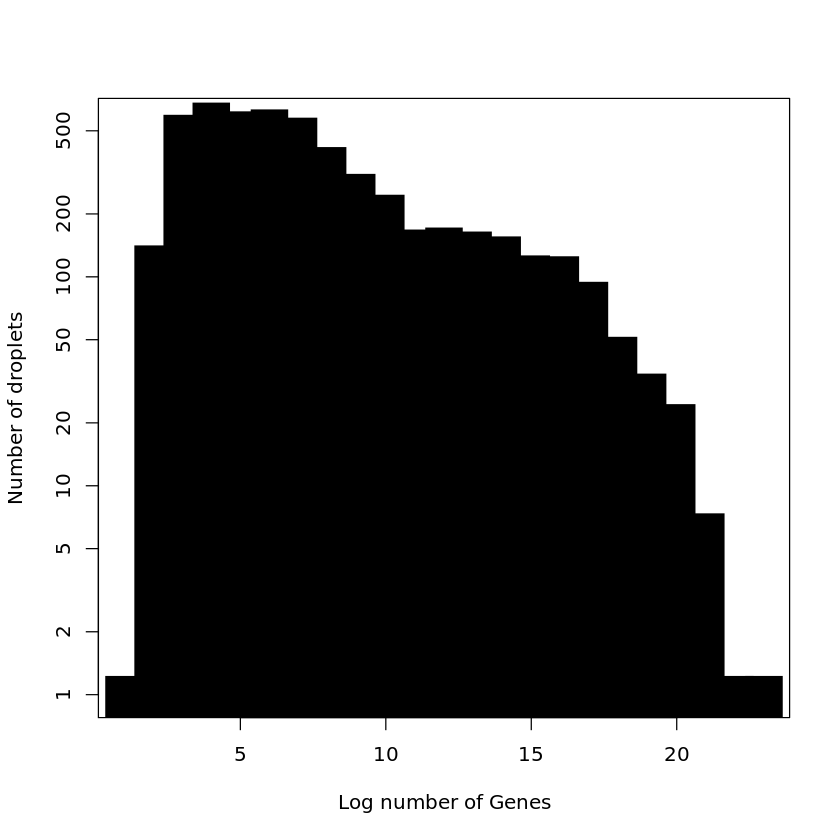

pdf 
  3

png 
  2

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'colData': object 'P3_called_exp' not found


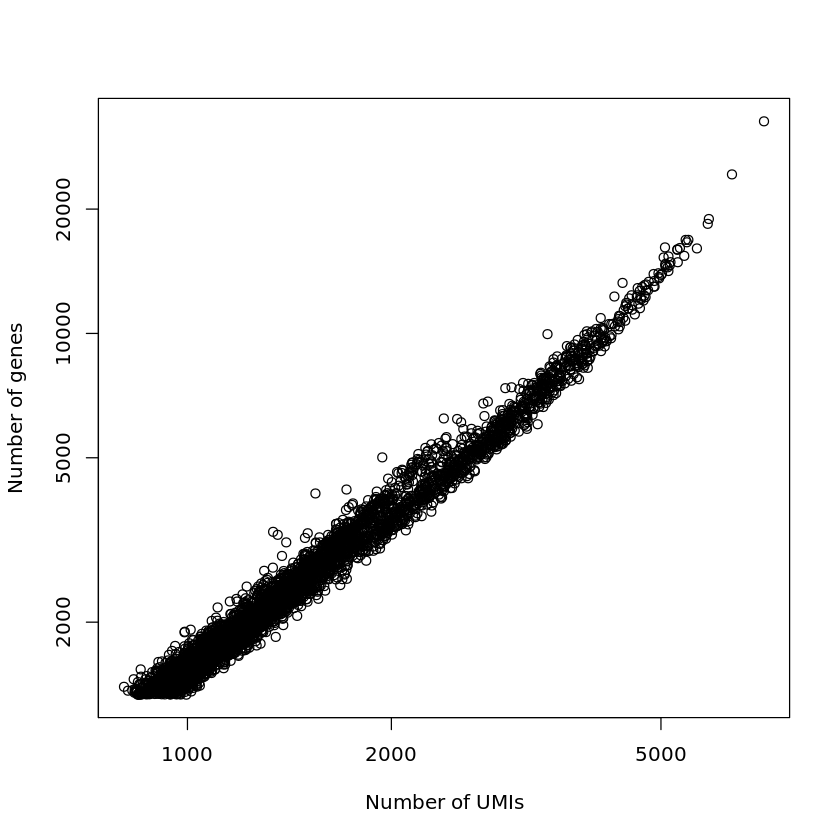

In [97]:
P3_raw <- read10xCounts("/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P3/Solo.out/")

P3_raw_umi_droplet_counts = colSums(counts(P3_raw))+1
P3_raw_droplet_umi_hist = hist(log(P3_raw_umi_droplet_counts),plot=FALSE,breaks=20) 
plot(P3_raw_droplet_umi_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of UMIs",ylab="Number of droplets")
dev.copy(pdf,'../plots/P3_raw_umi_hist.pdf')
dev.off()

P3_br_out = barcodeRanks(counts(P3_raw))
plot(P3_br_out$rank, P3_br_out$total+1, log="xy", xlab="Rank", ylab="Total")
dev.copy(pdf,'../plots/P3_raw_umi_rank_plot.pdf')
dev.off()

P3_raw_gene_droplet_counts = colSums(counts(P3_raw)>0)+1
P3_raw_droplet_gene_hist = hist(log(P3_raw_gene_droplet_counts),plot=FALSE,breaks=20) 
plot(P3_raw_droplet_gene_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of Genes",ylab="Number of droplets")
dev.copy(pdf,'../plots/P3_raw_gene_hist.pdf')
dev.off()

plot(P3_raw_umi_droplet_counts~P3_raw_gene_droplet_counts,log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'../plots/P3_raw_umi_vs_gene.pdf')
dev.off()

#predict which droplets are empty, the defaultdrops functin replciates the same task in cell ranger
P3_called <- defaultDrops(counts(P3_raw))

plot(P3_raw_umi_droplet_counts~P3_raw_gene_droplet_counts,col=ifelse(P3_called,"red","black"),log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'../plots/P3_raw_umi_vs_gene_called.pdf')
dev.off()

plot(P3_br_out$rank, P3_br_out$total+1, col=ifelse(P3_called,"red","black"),log="xy", xlab="Rank", ylab="Total")
dev.copy(pdf,'../plots/P3_raw_umi_rank_called_plot.pdf')
dev.off()

#plot number of umis per cell
P3_called_droplet_umi_hist = hist(P3_raw_umi_droplet_counts[P3_called],plot=FALSE,breaks=30) 
plot(P3_called_droplet_umi_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of UMIs",ylab="Number of Cells")
dev.copy(pdf,'../plots/P3_called_umi_hist.pdf')
dev.off()

P3_raw_droplet_gene_hist = hist(log(P3_raw_gene_droplet_counts[P3_called]),plot=FALSE,breaks=30,border="black") 
plot(P3_raw_droplet_gene_hist$count, log="y", type='h', lwd=30, lend=2,xlab="Log number of Genes",ylab="Number of droplets")
dev.copy(pdf,'../plots/P3_called_gene_hist.pdf')
dev.off()

plot(P3_raw_umi_droplet_counts[P3_called]~P3_raw_gene_droplet_counts[P3_called],log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'../plots/P3_called_umi_vs_gene_hist.pdf')
dev.off()

P3_called_exp <- cxds_bcds_hybrid(P3_called_exp,list("retRes"=TRUE))

#selected doublets should have higher number of UMIs and genes
plot(P3_raw_umi_droplet_counts[P3_called]~P3_raw_gene_droplet_counts[P3_called],col=ifelse(P3_called_exp$hybrid_score>1.0,"red","black"),log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'../plots/P3_doublets_selected_scatter.pdf')
dev.off()

write.csv(P3_called_exp@colData,"../paper_inter_data/P3_empty_drops_filtered_annotation.csv")
writeMM(counts(P3_called_exp),"../paper_inter_data/P3_empty_drops_filtered_annotation.csv")

[17:37:57] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


pdf 
  3

png 
  2

NULL

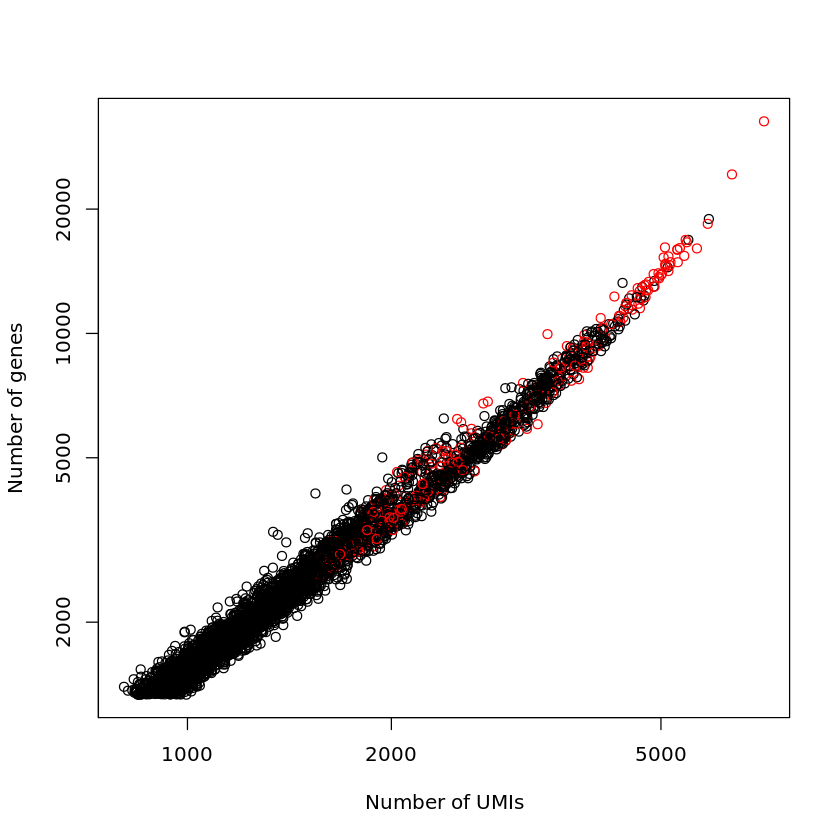

In [100]:
P3_called_exp = P3_raw[,P3_called]

P3_called_exp <- cxds_bcds_hybrid(P3_called_exp,list("retRes"=TRUE))

#selected doublets should have higher number of UMIs and genes
plot(P3_raw_umi_droplet_counts[P3_called]~P3_raw_gene_droplet_counts[P3_called],col=ifelse(P3_called_exp$hybrid_score>1.0,"red","black"),log="xy",xlab="Number of UMIs",ylab="Number of genes")
dev.copy(pdf,'../plots/P3_doublets_selected_scatter.pdf')
dev.off()

write.csv(P3_called_exp@colData,"../paper_inter_data/P3_empty_drops_filtered_annotation.csv")

writeMM(counts(P3_called_exp),"../paper_inter_data/P3_empty_drops_filtered_counts.mtx")

In [98]:
write.csv(p0_called_exp@colData,"../paper_inter_data/p0_empty_drops_filtered_annotation.csv")
writeMM(counts(p0_called_exp),"../paper_inter_data/p0_empty_drops_filtered_counts.mtx")
write.csv(P2_called_exp@colData,"../paper_inter_data/P2_empty_drops_filtered_annotation.csv")

writeMM(counts(P2_called_exp),"../paper_inter_data/P2_empty_drops_filtered_counts.mtx")
write.csv(P3_called_exp@colData,"../paper_inter_data/P3_empty_drops_filtered_annotation.csv")
writeMM(counts(P3_called_exp),"../paper_inter_data/P3_empty_drops_filtered_counts.mtx")

NULL

ERROR: Error in is.data.frame(x): object 'P2_called_exp' not found
